In [2]:
import numpy as np
from pushers.minkowski_pushers import IntegrateTrajectory
import matplotlib.pyplot as plt
from progiter import ProgIter

#### Example 1. Regular Boris push in uniform $E\times B$ field

In [4]:
dt = 0.2
tmax = 30
x0, u0 = np.array([0, 0, 0]), np.array([0.1, 0, 0])

ts, xs, us = IntegrateTrajectory(
    x0,
    u0,
    dt,
    tmax,
    E_func=lambda _: np.array([0, 0.01, 0]),
    B_func=lambda _: np.array([0, 0, 1]),
    progressbar = ProgIter
)

 100.00% 150/150... rate=12478.24 Hz, eta=0:00:00, total=0:00:00


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

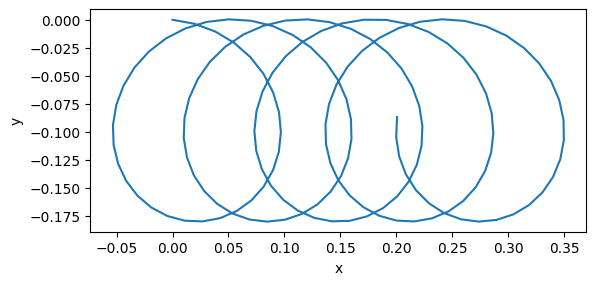

In [5]:
plt.plot(xs[:, 0], xs[:, 1])
plt.gca().set_aspect("equal")
plt.gca().set(
    xlabel="x",
    ylabel="y",
)

#### Example 2. Synchrotron cooling

In [7]:
dt = 0.5
tmax = 5000
pitch_angle = 30 * np.pi / 180
gamma0 = 100

u0 = np.sqrt(gamma0**2 - 1)

x0, u0 = np.array([0, 0, 0]), np.array(
    [np.sin(pitch_angle) * u0, 0, np.cos(pitch_angle) * u0]
)

ts, xs, us = IntegrateTrajectory(
    x0,
    u0,
    dt,
    tmax,
    E_func=lambda _: np.array([0, 0, 0]),
    B_func=lambda _: np.array([0, 0, 1]),
    drags={
        "sync": {"gamma_rad": 10.0},
    },
    progressbar=ProgIter
)

 100.00% 10000/10000... rate=8043.88 Hz, eta=0:00:00, total=0:00:01


[Text(0.5, 0, 'y'), Text(0, 0.5, 'z')]

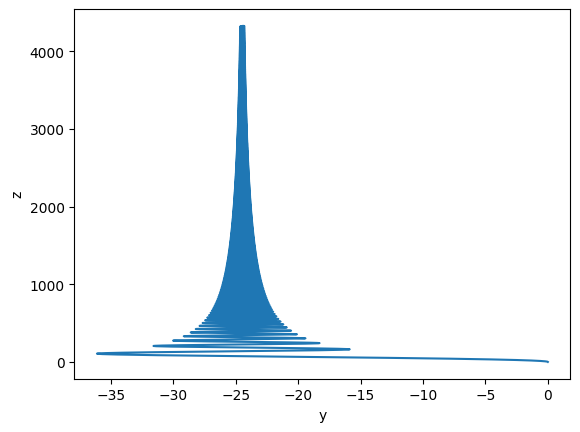

In [8]:
plt.plot(xs[:, 1], xs[:, 2])
plt.gca().set(
    xlabel="y",
    ylabel="z",
)

[Text(0.5, 0, 't'), Text(0, 0.5, '$\\beta_\\parallel$')]

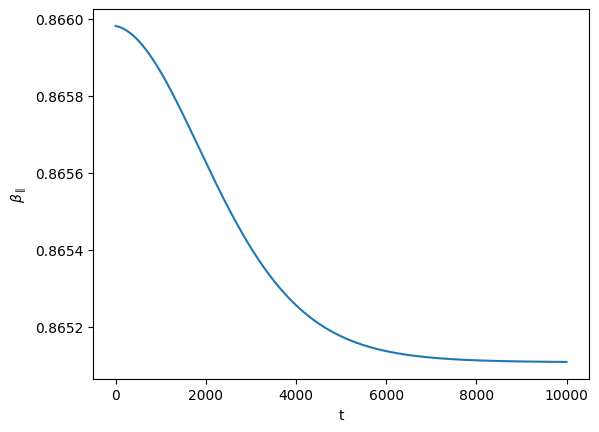

In [9]:
plt.plot(us[:, 2] / np.sqrt(1 + np.sum(us**2, axis=-1)))
plt.gca().set(
    xlabel="t",
    ylabel=r"$\beta_\parallel$",
)

[None, Text(0.5, 0, 'y'), Text(0, 0.5, '$\\gamma$')]

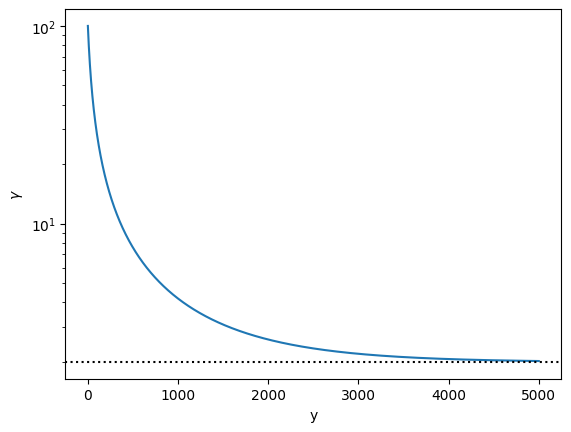

In [11]:
beta_par = (u0 / np.sqrt(1 + np.sum(u0**2)))[2]

plt.plot(ts, np.sqrt(1 + np.sum(us**2, axis=-1)))
plt.gca().axhline(1 / np.sqrt(1 - beta_par**2), c="k", ls=":")
plt.gca().set(
    yscale="log",
    xlabel="y",
    ylabel="$\gamma$",
)

#### Example 3. $pp$ hadronic interaction

In [13]:
dt = 0.1
tmax = 2000

u0 = 1000.0
x0, u0 = np.array([0, 0, 0]), np.array([u0, 0, 0])

ts, xs, us = IntegrateTrajectory(
    x0,
    u0,
    dt,
    tmax,
    E_func=lambda _: np.array([0, 0, 0]),
    B_func=lambda _: np.array([0, 0, 0]),
    drags={
        "pp": {"n_bg": 1 / 50, "u_bg": np.array([0, 1, 0]), "scheme": "prob"},
    },
    progressbar=ProgIter
)

 100.00% 20000/20000... rate=7114.22 Hz, eta=0:00:00, total=0:00:02


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

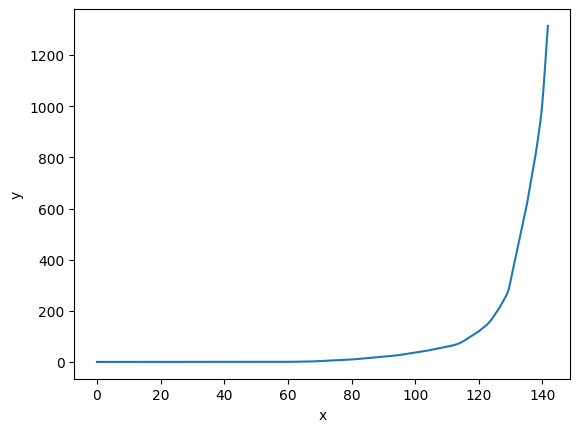

In [14]:
plt.plot(xs[:, 0], xs[:, 1])
plt.gca().set(
    xlabel="x",
    ylabel="y",
)

[None, Text(0.5, 0, '$t$'), Text(0, 0.5, '$u_i$')]

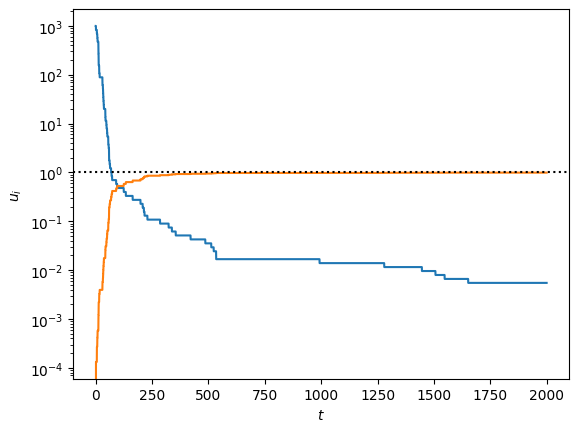

In [15]:
plt.plot(ts, us[:, 0])
plt.plot(ts, us[:, 1])
plt.gca().axhline(1.0, c="k", ls=":")
plt.gca().set(
    yscale="log",
    xlabel=r"$t$",
    ylabel=r"$u_i$",
)

#### Example 4. Hybrid Boris/GCA

In [16]:
dt = 0.2
tmax = 10000

x0, u0 = np.array([0, 0, 0]), np.array([1, 0, 1])

ts, xs, us, regimes = IntegrateTrajectory(
    x0,
    u0,
    dt,
    tmax,
    E_func=lambda _: np.array([0, 0, 0]),
    B_func=lambda _: np.array([0, 0, 1]),
    drags={
        "sync": {"gamma_rad": 10},
    },
    use_hybrid=True,
    progressbar=ProgIter,
)

 100.00% 50000/50000... rate=2893.44 Hz, eta=0:00:00, total=0:00:14


[Text(0.5, 0, 'x'), Text(0, 0.5, 'z')]

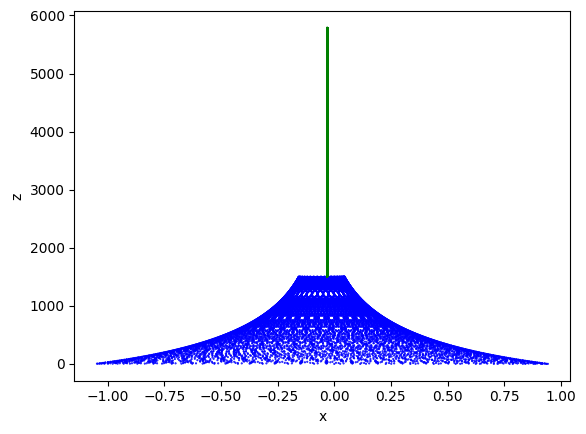

In [17]:
plt.scatter(
    xs[:, 0],
    xs[:, 2],
    c=["b" if r == "Boris" else "g" for r in regimes[:]],
    s=0.25,
)
plt.gca().set(
    xlabel="x",
    ylabel="z",
)